In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = [224,224,3]))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization_24 (Batc (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 106, 106, 64)     

In [62]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/covid-dataset/train',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/covid-dataset/test',
                                            target_size = (224,224),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 4277 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [65]:
r = model.fit_generator(training_set,
                        steps_per_epoch = len(training_set),
                        epochs = 50,
                        validation_data = test_set,
                        validation_steps = len(test_set))

Epoch 1/50
134/134 [==============================] - 56s 416ms/step - loss: 0.4567 - accuracy: 0.8440 - val_loss: 3.0007 - val_accuracy: 0.5965
Epoch 2/50
134/134 [==============================] - 56s 415ms/step - loss: 0.2258 - accuracy: 0.9212 - val_loss: 1.3424 - val_accuracy: 0.5965
Epoch 3/50
134/134 [==============================] - 55s 411ms/step - loss: 0.2027 - accuracy: 0.9299 - val_loss: 0.3207 - val_accuracy: 0.9035
Epoch 4/50
134/134 [==============================] - 55s 414ms/step - loss: 0.1920 - accuracy: 0.9327 - val_loss: 0.6679 - val_accuracy: 0.7018
Epoch 5/50
134/134 [==============================] - 55s 414ms/step - loss: 0.1687 - accuracy: 0.9376 - val_loss: 0.1299 - val_accuracy: 0.9503
Epoch 6/50
134/134 [==============================] - 56s 416ms/step - loss: 0.1705 - accuracy: 0.9390 - val_loss: 0.6418 - val_accuracy: 0.7222
Epoch 7/50
134/134 [==============================] - 56s 420ms/step - loss: 0.1503 - accuracy: 0.9455 - val_loss: 0.3249 - val_ac

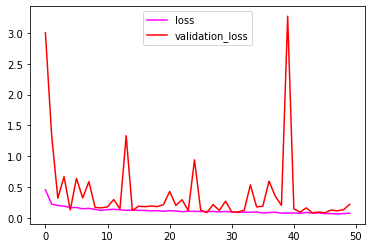

In [66]:
plt.plot(r.history['loss'],label = 'loss',color = 'magenta')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'red')
plt.legend()
plt.show()

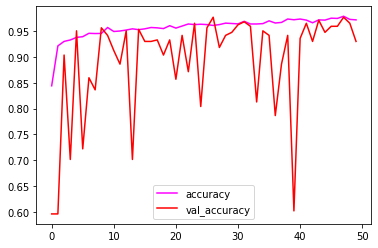

In [67]:
plt.plot(r.history['accuracy'],label = 'accuracy',color = 'magenta')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy',color = 'red')
plt.legend()
plt.show()

In [88]:
predict = load_img('/content/drive/My Drive/covid-dataset/validation/NORMAL2-IM-0059-0001.jpeg',target_size=(224,224))
x = image.img_to_array(predict)
z = np.expand_dims(x,axis = 0)
result = model.predict(z)
final = np.argmax(result, axis=1)
if final== 1:
  print('NORMAL')
else:
  print('COVID')

NORMAL


In [90]:
model.save('covidpredictor.h5')